In [2]:
MYPROJECT = '/home/vimm/code/spring_exercise/stock_simulation_analysis/stock_simulation_analysis'
import os, sys
sys.path.insert(0, MYPROJECT)
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "settings")
import django
django.setup()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
from django_pandas.io import read_frame

from stock_api.models import StockData
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
qs = StockData.objects.all()
df = read_frame(qs)

In [4]:
data = df['open']
stock_data = np.array(data.values.reshape((len(data),1)))
stock_data.shape #(1257, 1)
stock_data[:2]

array([[ 336.48877 ],
       [ 335.298218]])

In [5]:
# Split the data into training/testing sets
stock_X_train = stock_data[:500]
stock_X_test = stock_data[1000:1127,]

# Split the targets into training/testing sets
stock_y_train = stock_data[500:1000]
stock_y_test = stock_data[1127:1254]

In [6]:
regr = linear_model.LinearRegression()
regr.fit(stock_X_train, stock_y_train)
stock_y_pred = regr.predict(stock_X_test)

In [7]:
 stock_y_pred

array([[ 916.20584525],
       [ 913.08141489],
       [ 915.08997727],
       [ 912.01017091],
       [ 909.34995859],
       [ 911.75130918],
       [ 907.27890136],
       [ 905.73455792],
       [ 907.70737681],
       [ 903.33320733],
       [ 900.13734624],
       [ 901.92273502],
       [ 901.69062555],
       [ 902.21733934],
       [ 900.14628211],
       [ 902.14590862],
       [ 905.50244845],
       [ 905.89523577],
       [ 911.74237331],
       [ 910.48369832],
       [ 902.90467742],
       [ 889.5410683 ],
       [ 897.88773852],
       [ 893.54032131],
       [ 896.46838569],
       [ 902.59225581],
       [ 904.97573466],
       [ 901.92273502],
       [ 905.18997238],
       [ 911.74237331],
       [ 917.62525344],
       [ 914.18834701],
       [ 907.72524855],
       [ 909.82305894],
       [ 913.02785501],
       [ 908.46620007],
       [ 906.60938057],
       [ 908.19840247],
       [ 911.12641239],
       [ 910.84967892],
       [ 911.43883311],
       [ 909.698

In [8]:
# stock_X_test

In [9]:
coefficients = regr.coef_ # array([[ 0.89269439]])
#     # mean squared error
#     # Explained variance score: 1 is perfect prediction
#     RSQ = r2_score(mark_y_test, mark_y_pred)
# stock_y_test.values.reshape((len(stock_y_test),1))

In [10]:
MSE = mean_squared_error(stock_y_test, stock_y_pred)
MSE

3323.2163132907508

In [11]:
# RSQ = r2_score(stock_y_test, stock_y_pred)

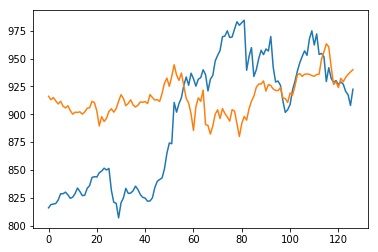

In [12]:
plt.plot(stock_y_test)
plt.plot(stock_y_pred)

RMSE depends on the dependent variable. The unit of RMSE is same as dependent variable. If your data has a range of 0 to 100000 , it is pretty huge. If RMSE value of 3000 is small. 

Play with other input variables, and compare your RMSE values. 

The smaller the RMSE value, the better the model.

Also, try to compare your RMSE values of both training and testing data. If they are almost similar, your model is good. If the RMSE for the testing data is much higher than that of the training data, it is likely that you've badly over fit the data.

In [13]:
mean_squared_error(stock_X_train, stock_y_train)

29422.51360958592

In [14]:
mean_squared_error(stock_X_test, stock_y_test)

15868.361142483302

In [15]:
# Split the data into training/testing sets
stock_X_train = stock_data[:450]
stock_X_test = stock_data[900:1077,]

# Split the targets into training/testing sets
stock_y_train = stock_data[450:900]
stock_y_test = stock_data[1077:1254]

In [16]:
regr = linear_model.LinearRegression()
regr.fit(stock_X_train, stock_y_train)
stock_y_pred = regr.predict(stock_X_test)

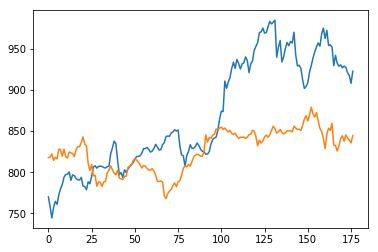

In [17]:
plt.plot(stock_y_test)
plt.plot(stock_y_pred)

In [18]:
mean_squared_error(stock_X_train, stock_y_train)

24928.160078345074

In [19]:
mean_squared_error(stock_X_test, stock_y_test)

17166.766332412433

In [20]:
df.columns

Index(['id', 'companyName', 'companyAbbr', 'date', 'open', 'high', 'low',
       'close', 'adjClose', 'volume'],
      dtype='object')

In [21]:
# filtering company
qs = StockData.objects.filter(companyAbbr = 'RUT') #RUSSELL 2000 INDEX(company name)
df = read_frame(qs)
data = df['open']
stock_data = np.array(data.values.reshape((len(data),1)))
stock_data.shape #(1258, 1)

(1258, 1)

In [22]:
# Split the data into training/testing sets
stock_X_train = stock_data[:350]
stock_X_test = stock_data[700:979,]

# Split the targets into training/testing sets
stock_y_train = stock_data[350:700]
stock_y_test = stock_data[979:]

In [23]:
regr = linear_model.LinearRegression()
regr.fit(stock_X_train, stock_y_train)
stock_y_pred = regr.predict(stock_X_test)

In [24]:
stock_y_pred

array([[ 1258.69863119],
       [ 1256.38235843],
       [ 1259.02017848],
       [ 1257.26446859],
       [ 1257.54047759],
       [ 1261.58401169],
       [ 1260.69620504],
       [ 1258.93764676],
       [ 1258.83521164],
       [ 1262.91570417],
       [ 1262.51447354],
       [ 1266.36164754],
       [ 1267.81005177],
       [ 1268.8941838 ],
       [ 1268.73485185],
       [ 1266.78847834],
       [ 1266.29335717],
       [ 1261.77748869],
       [ 1257.83642471],
       [ 1259.71732152],
       [ 1258.83805974],
       [ 1253.20387919],
       [ 1255.63682871],
       [ 1253.16118928],
       [ 1253.46852965],
       [ 1254.8457607 ],
       [ 1258.76976966],
       [ 1260.62221819],
       [ 1263.04092608],
       [ 1262.27260986],
       [ 1263.00393265],
       [ 1261.6238185 ],
       [ 1259.04293027],
       [ 1256.08925969],
       [ 1259.30188397],
       [ 1254.10307937],
       [ 1247.50710532],
       [ 1247.58109217],
       [ 1248.86443268],
       [ 1249.45063044],


In [25]:
stock_X_test

array([[ 1258.540039],
       [ 1250.400024],
       [ 1259.670044],
       [ 1253.5     ],
       [ 1254.469971],
       [ 1268.680054],
       [ 1265.560059],
       [ 1259.380005],
       [ 1259.02002 ],
       [ 1273.359985],
       [ 1271.949951],
       [ 1285.469971],
       [ 1290.560059],
       [ 1294.369995],
       [ 1293.810059],
       [ 1286.969971],
       [ 1285.22998 ],
       [ 1269.359985],
       [ 1255.51001 ],
       [ 1262.119995],
       [ 1259.030029],
       [ 1239.22998 ],
       [ 1247.780029],
       [ 1239.079956],
       [ 1240.160034],
       [ 1245.      ],
       [ 1258.790039],
       [ 1265.300049],
       [ 1273.800049],
       [ 1271.099976],
       [ 1273.670044],
       [ 1268.819946],
       [ 1259.75    ],
       [ 1249.369995],
       [ 1260.660034],
       [ 1242.390015],
       [ 1219.209961],
       [ 1219.469971],
       [ 1223.97998 ],
       [ 1226.040039],
       [ 1235.170044],
       [ 1238.319946],
       [ 1232.52002 ],
       [ 12

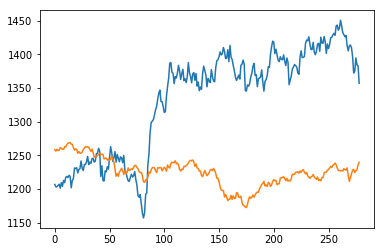

In [26]:
plt.plot(stock_y_test)
plt.plot(stock_y_pred)

In [27]:
mean_squared_error(stock_X_train, stock_y_train)

52055.660790123271

In [28]:
mean_squared_error(stock_X_test, stock_y_test)

53699.32588329909

Almost perfect fit

In [29]:
qs = StockData.objects.all()
df = read_frame(qs)
df

,id,companyName,companyAbbr,date,open,high,low,close,adjClose,volume
0,1359,Alphabet Inc,GOOG,2012-08-20,336.488770,338.167480,335.074066,336.508698,336.508698,3529300.0
1,1360,Alphabet Inc,GOOG,2012-08-21,335.298218,337.734100,329.848633,333.504944,333.504944,4461000.0
2,1361,Alphabet Inc,GOOG,2012-08-22,332.443909,339.029236,332.105194,337.325623,337.325623,3832600.0
3,1362,Alphabet Inc,GOOG,2012-08-23,335.876068,338.969452,334.247162,337.136322,337.136322,3581700.0
4,1363,Alphabet Inc,GOOG,2012-08-24,336.538574,338.954529,335.781403,338.047913,338.047913,2863800.0
5,1364,Alphabet Inc,GOOG,2012-08-27,330.257111,334.745300,328.389130,333.360474,333.360474,5246900.0
6,1365,Alphabet Inc,GOOG,2012-08-28,331.258362,337.544800,331.128845,337.360504,337.360504,4132600.0
7,1366,Alphabet Inc,GOOG,2012-08-29,337.420258,343.208557,336.812531,342.720398,342.720398,6002900.0
8,1367,Alphabet Inc,GOOG,2012-08-30,340.842438,342.411560,338.820007,339.567230,339.567230,3265900.0
9,1368,Alphabet Inc,GOOG,2012-08-31,340.722900,343.004333,338.750275,341.265839,341.265839,4270000.0


In [30]:
all_companyAbbr = df['companyAbbr'].unique()

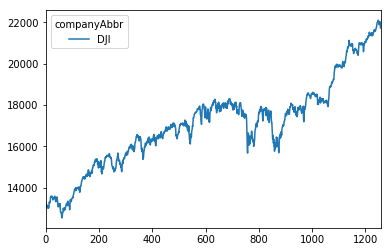

In [31]:
a = df[(df['companyAbbr'] == 'DJI')]
af = pd.pivot_table(a, values = 'open', index=['date'], columns = ['companyAbbr']).reset_index() #panas.core.frame.DataFrame
af.plot()
# af

In [32]:
qs = StockData.objects.filter(companyAbbr__in=all_companyAbbr)
df = read_frame(qs)
data = df['open']
data.shape

(38003,)

In [33]:
stock_data = np.array(data.values.reshape((len(data), 1)))#(38003,1)
# Split the data into training/testing sets
stock_X_train = stock_data[:11000]
stock_X_test = stock_data[22000:30000, ]

# Split the targets into training/testing sets
stock_y_train = stock_data[11000:22000]
stock_y_test = stock_data[30000:38000]

regr = linear_model.LinearRegression()
regr.fit(stock_X_train, stock_y_train)
stock_y_pred = regr.predict(stock_X_test)

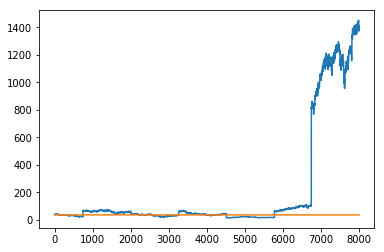

In [34]:
plt.plot(stock_y_test)
plt.plot(stock_y_pred)

In [35]:
mean_squared_error(stock_X_train, stock_y_train)

65826922.596087955

In [36]:
mean_squared_error(stock_X_test, stock_y_test)

199738.24596233814

In [37]:
# pd.pivot_table(df, values = 'open', index=['companyName'], columns = ['companyAbbr']).reset_index() #panas.core.frame.DataFrame

In [38]:
def predict_price(dates,prices,x):
    linear_mod = linear_model.LinearRegression() #defining the linear regression model
    dates = np.reshape(dates.values,(len(dates),1)) # converting to matrix of n X 1
    prices = np.reshape(prices.values,(len(prices),1))
    linear_mod.fit(dates,prices) #fitting the data points in the model
    predicted_price =linear_mod.predict(x)
    return predicted_price[0][0],linear_mod.coef_[0][0] ,linear_mod.intercept_[0]

def show_plot(dates,prices):
    linear_mod = linear_model.LinearRegression()
    dates = np.reshape(dates.values,(len(dates),1)) # converting to matrix of n X 1
    prices = np.reshape(prices.values,(len(prices),1))
    linear_mod.fit(dates,prices) #fitting the data points in the model
    plt.scatter(dates,prices,color='green') #plotting the initial datapoints 
    plt.plot(dates,linear_mod.predict(dates),color='blue',linewidth=2) #plotting the line made by linear regression
    plt.show()
    return

In [39]:
# dates = []
# prices = []

In [40]:
qs = StockData.objects.filter(companyAbbr = 'RUT') #RUSSELL 2000 INDEX(company name)
df = read_frame(qs)
dates = df['date']
price = df['open']
# type(dates)
# dates
import datetime as dt
df['date'] = pd.to_datetime(df['date'])
dates=df['date'].map(dt.datetime.toordinal)
# dates#736559

In [41]:
# n_date = 2012-08-20
predicted_price, coefficient, constant = predict_price(dates,price,736559)  

In [46]:
constant

-178546.19850396152

In [45]:
coefficient

0.24426088454344896

In [42]:
predicted_price

1366.3543544767017

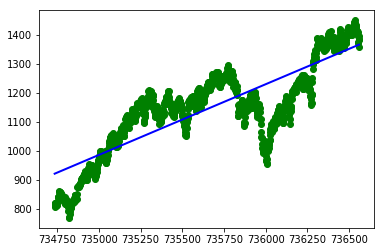

In [43]:
show_plot(dates,price)

In [47]:
d = 736559
price =  0.244260884543 * d +  -178546.198504
price

1366.3543541075196

In [ ]:
# date converter
from datetime import datetime
dt = datetime.fromordinal(736559)
dt